Here we will use the TF Agents to train the CartPole environment with DQN.
TF Agents package makes the implementation of RL algo easier.

In [1]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [2]:
import tensorflow as tf
from tf_agents.environments import suite_gym

In [3]:
tf.__version__

'2.15.1'

In [4]:
import keras

In [5]:
keras.__version__

'2.15.0'

In [6]:
env = suite_gym.load("CartPole-v1")

In [7]:
env

In [8]:
env.gym

<TimeLimit<OrderEnforcing<CartPoleEnv<CartPole-v1>>>>

In [9]:
env.reset()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.02477055,  0.03632823,  0.01082317, -0.04031572], dtype=float32)})

In [10]:
env.step(0)

TimeStep(
{'step_type': array(1),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.02404399, -0.15894724,  0.01001686,  0.25576228], dtype=float32)})

Explore Environment Specification

In [11]:
env.observation_spec()

BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])

In [12]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)

In [13]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])})

In [14]:
env.reward_spec()

ArraySpec(shape=(), dtype=dtype('float32'), name='reward')

In [15]:
env.discount_spec()

BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

In [16]:
env.current_time_step()

TimeStep(
{'step_type': array(1),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.02404399, -0.15894724,  0.01001686,  0.25576228], dtype=float32)})

Wrap the environment with TFPyEnvironment which supports both py and tf environments.

In [17]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment

In [18]:
env = TFPyEnvironment(env)

In [19]:
env

In [20]:
env.reset()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.01112201, -0.03203058, -0.03385083,  0.02849746]],
      dtype=float32)>})

In [21]:
env.step(0)

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.01176262, -0.22665115, -0.03328088,  0.3103108 ]],
      dtype=float32)>})

In [22]:
env.observation_spec()

BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))

In [23]:
env.action_spec()

BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64))

In [24]:
env.time_step_spec()

TimeStep(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))})

In [25]:
env.reward_spec()

TensorSpec(shape=(), dtype=tf.float32, name='reward')

In [26]:
env.discount_spec()

BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

In [27]:
env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.01176262, -0.22665115, -0.03328088,  0.3103108 ]],
      dtype=float32)>})

Create a Deep Q Network

In [28]:
from tf_agents.networks.q_network import QNetwork

In [29]:
help(QNetwork)

Help on class QNetwork in module tf_agents.networks.q_network:

class QNetwork(tf_agents.networks.network.Network)
 |  QNetwork(input_tensor_spec, action_spec, preprocessing_layers=None, preprocessing_combiner=None, conv_layer_params=None, fc_layer_params=(75, 40), dropout_layer_params=None, activation_fn=<function relu at 0x000001591A638040>, kernel_initializer=None, batch_squash=True, dtype=tf.float32, q_layer_activation_fn=None, name='QNetwork')
 |  
 |  Feed Forward network.
 |  
 |  Method resolution order:
 |      QNetwork
 |      tf_agents.networks.network.Network
 |      tf_keras.src.engine.base_layer.Layer
 |      tensorflow.python.module.module.Module
 |      tensorflow.python.trackable.autotrackable.AutoTrackable
 |      tensorflow.python.trackable.base.Trackable
 |      tf_keras.src.utils.version_utils.LayerVersionSelector
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_tensor_spec, action_spec, preprocessing_layers=None, preprocessing_c

In [30]:
q_net = QNetwork(env.observation_spec(), env.action_spec())

Create a DQN agent

In [31]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tf_agents.utils import common

In [32]:
help(DqnAgent)

Help on class DqnAgent in module tf_agents.agents.dqn.dqn_agent:

class DqnAgent(tf_agents.agents.tf_agent.TFAgent)
 |  DqnAgent(time_step_spec: tf_agents.trajectories.time_step.TimeStep, action_spec: Union[tensorflow.python.framework.type_spec.TypeSpec, tensorflow.python.framework.tensor.TensorSpec, tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec, tensorflow.python.framework.sparse_tensor.SparseTensorSpec, ForwardRef('tf_agents.distributions.utils.DistributionSpecV2'), Iterable[ForwardRef('NestedTensorSpec')], Mapping[str, ForwardRef('NestedTensorSpec')]], q_network: tf_agents.networks.network.Network, optimizer: Union[tf_keras.src.optimizers.optimizer.Optimizer, tensorflow.python.training.optimizer.Optimizer], observation_and_action_constraint_splitter: Optional[Callable[[Union[tensorflow.python.framework.type_spec.TypeSpec, tensorflow.python.framework.tensor.TensorSpec, tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec, tensorflow.python.framework.sparse_tensor

In [33]:
optimizer = Adam(learning_rate=0.001)
discount_factor = 1
epsilon_fn = PolynomialDecay(
    initial_learning_rate=1.0,
    decay_steps=1000,
    end_learning_rate=0.01,
    power=1
    )
target_model_update = 1
train_step = tf.Variable(0)

agent = DqnAgent(
    env.time_step_spec(),
    env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    epsilon_greedy=lambda:epsilon_fn(train_step),
    train_step_counter=train_step,
    gamma=discount_factor,
    target_update_period=target_model_update
    )

agent.initialize()

In [34]:
agent.policy

In [35]:
env.time_step_spec()

TimeStep(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))})

In [36]:
agent.initialize()

Create a Replay Buffer to store experiences

In [37]:
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer

In [38]:
agent.collect_data_spec

Trajectory(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))})

In [39]:
replay_buffer = TFUniformReplayBuffer(
    data_spec= agent.collect_data_spec,
    batch_size= env.batch_size,
    max_length= 100000
)

Create an observer to write into the replay buffer

In [40]:
replay_buffer_observer = replay_buffer.add_batch    

In [41]:
replay_buffer

In [42]:
replay_buffer_observer

<bound method ReplayBuffer.add_batch of <tf_agents.replay_buffers.tf_uniform_replay_buffer.TFUniformReplayBuffer object at 0x000001591EABFF10>>

Create a Driver that explores environment using a given policy, collects experience and broadcast them to observer.

In [43]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
from tf_agents.metrics import tf_metrics

In [44]:
train_metrics = [
    tf_metrics.AverageReturnMetric()
]

In [45]:
collect_driver = DynamicStepDriver(
    env=env,
    policy= agent.collect_policy,
    observers= [replay_buffer_observer] + train_metrics,
    num_steps=1
)

In [46]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

Create a driver to just fill the replay buffer with some experiences with a random policy

In [47]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

In [48]:
initial_collect_policy = RandomTFPolicy(env.time_step_spec(), env.action_spec())

In [49]:
initial_collect_policy

In [50]:
initial_driver = DynamicStepDriver(
    env,
    initial_collect_policy,
    [replay_buffer_observer],
    num_steps=1000
)

In [51]:
final_time_step, final_policy_state = initial_driver.run()

In [52]:
final_time_step

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([2])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.08334601, -0.43385312,  0.21460758,  1.1857538 ]],
      dtype=float32)>})

In [53]:
final_policy_state

()

Create a Dataset of sample a batch of trajectories for agent to train.

In [54]:
from tf_agents.trajectories.trajectory import to_transition

In [55]:
trajectories, buffer_info = replay_buffer.get_next(sample_batch_size=2, num_steps=3)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [56]:
trajectories

Trajectory(
{'step_type': <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]])>,
 'observation': <tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[ 0.00804686, -0.00561635, -0.10083202, -0.16280498],
        [ 0.00793454,  0.19079366, -0.10408812, -0.485518  ],
        [ 0.01175041,  0.3872186 , -0.11379848, -0.8091074 ]],

       [[-0.00754528, -0.19310214, -0.04984554,  0.24757186],
        [-0.01140732, -0.38747808, -0.04489411,  0.5241251 ],
        [-0.01915688, -0.5819404 , -0.03441161,  0.8023303 ]]],
      dtype=float32)>,
 'action': <tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 1, 0],
       [0, 0, 0]], dtype=int64)>,
 'policy_info': (),
 'next_step_type': <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]])>,
 'reward': <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>,
 'discount': <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.

In [57]:
buffer_info

BufferInfo(ids=<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[381, 382, 383],
       [125, 126, 127]], dtype=int64)>, probabilities=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.00096154, 0.00096154], dtype=float32)>)

In [58]:
time_steps, action_steps, next_time_steps = to_transition(trajectories)

In [59]:
time_steps

TimeStep(
{'step_type': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]])>,
 'reward': <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>,
 'discount': <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>,
 'observation': <tf.Tensor: shape=(2, 2, 4), dtype=float32, numpy=
array([[[ 0.00804686, -0.00561635, -0.10083202, -0.16280498],
        [ 0.00793454,  0.19079366, -0.10408812, -0.485518  ]],

       [[-0.00754528, -0.19310214, -0.04984554,  0.24757186],
        [-0.01140732, -0.38747808, -0.04489411,  0.5241251 ]]],
      dtype=float32)>})

In [60]:
action_steps

PolicyStep(action=<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0]], dtype=int64)>, state=(), info=())

In [61]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
)

In [62]:
dataset

<_MapDataset element_spec=(Trajectory(
{'step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'observation': TensorSpec(shape=(64, 2, 4), dtype=tf.float32, name=None),
 'action': TensorSpec(shape=(64, 2), dtype=tf.int64, name=None),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'reward': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None),
 'discount': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None)}), BufferInfo(ids=TensorSpec(shape=(64, 2), dtype=tf.int64, name=None), probabilities=TensorSpec(shape=(64,), dtype=tf.float32, name=None)))>

In [63]:
it = iter(dataset)

In [64]:
it

In [65]:
next(it)

(Trajectory(
 {'step_type': <tf.Tensor: shape=(64, 2), dtype=int32, numpy=
 array([[1, 1],
        [1, 1],
        [1, 1],
        [1, 2],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1

In [66]:
next(it)[0]

Trajectory(
{'step_type': <tf.Tensor: shape=(64, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 2],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1

Create a training loop

In [67]:
from tf_agents.utils.common import function

In [68]:
collect_driver.run

<bound method DynamicStepDriver.run of <tf_agents.drivers.dynamic_step_driver.DynamicStepDriver object at 0x000001591ED5EF10>>

In [69]:
agent.train

<bound method TFAgent.train of <tf_agents.agents.dqn.dqn_agent.DqnAgent object at 0x000001591EAF6510>>

In [70]:
collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

In [71]:
collect_driver.run

In [72]:
agent.train

In [73]:
agent.collect_policy.get_initial_state(env.batch_size)

()

In [74]:
collect_driver.run(None, ())

(TimeStep(
 {'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
  'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[-0.01762554,  0.16892669,  0.02063639, -0.3050253 ]],
       dtype=float32)>}),
 ())

In [75]:
ts, ps = collect_driver.run(None,())

In [76]:
trajectories, buffer_info = next(it)

In [77]:
trajectories

Trajectory(
{'step_type': <tf.Tensor: shape=(64, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 2],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2

In [78]:
agent.training_data_spec

Trajectory(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))})

In [79]:
agent.train_sequence_length

2

In [80]:
agent.train(trajectories)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


LossInfo(loss=<tf.Tensor: shape=(), dtype=float32, numpy=1.1128343>, extra=DqnLossInfo(td_loss=<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([1.0886229 , 1.5892605 , 1.1110591 , 0.        , 1.1343968 ,
       1.0969319 , 1.026634  , 1.2525074 , 1.0593758 , 1.0703673 ,
       1.5365903 , 1.0551149 , 0.9358639 , 1.0036174 , 1.1690512 ,
       0.95261174, 1.0690074 , 1.2823228 , 0.9863183 , 1.0834103 ,
       0.9351009 , 1.280489  , 1.1224147 , 1.0973485 , 1.0758709 ,
       1.2963628 , 0.930966  , 1.0985256 , 1.0724196 , 1.0795599 ,
       1.0851401 , 1.0919621 , 1.6829996 , 0.9396096 , 0.9377649 ,
       1.3334156 , 1.280489  , 1.0795599 , 1.1482856 , 1.0899493 ,
       1.2293744 , 1.039397  , 1.0466753 , 1.116076  , 1.3569489 ,
       1.261539  , 1.1373965 , 1.0376269 , 1.0994176 , 1.0810084 ,
       1.0994176 , 1.0379374 , 0.9539401 , 1.120543  , 1.0384933 ,
       1.4580355 , 1.0816119 , 1.3013648 , 1.1628381 , 1.0977865 ,
       1.396906  , 0.8562319 , 1.1034409 , 0.94609267]

In [81]:
def compute_avg_return(environment, policy, num_episodes=10):

    total_return = 0.0
    for _ in range(num_episodes):

        time_step = environment.reset()
        episode_return = 0.0

        while not time_step.is_last():
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
        total_return += episode_return

    avg_return = total_return / num_episodes
    return avg_return.numpy()[0]

In [82]:
eval_env = suite_gym.load('CartPole-v1')
eval_env = TFPyEnvironment(eval_env)

In [83]:
def train_agent(n_iteration):
    # losses = []
    avg_returns = []
    cus_return = []
    train_step.assign(0)
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(env.batch_size)
    iterator = iter(dataset)

    for iteration in range(n_iteration):
        time_step, policy_state = collect_driver.run(time_step)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        loss = train_loss.loss.numpy()
        avg_return = train_metrics[0].result().numpy()
        
        if train_step%200 == 0:
            print(f'train step: {train_step.value()}      loss: {loss}')
        if train_step%1000 == 0:
            cust_re = compute_avg_return(eval_env, agent.policy,2)
            # losses.append(loss)
            avg_returns.append(avg_return)
            cus_return.append(cust_re)
            print(f'train step: {train_step.value()}    avg_return: {avg_return}     customreturn: {cust_re}')

    return avg_returns, cus_return
        

In [84]:
avg_returns, cus_return = train_agent(20000)

train step: 200      loss: 822.406494140625
train step: 400      loss: 38302.7734375
train step: 600      loss: 183441.8125
train step: 800      loss: 50025.0625
train step: 1000      loss: 12445.2451171875
train step: 1000    avg_return: 9.199999809265137     customreturn: 9.0
train step: 1200      loss: 22046.15234375
train step: 1400      loss: 9987.9462890625
train step: 1600      loss: 8024.8544921875
train step: 1800      loss: 4571.8212890625
train step: 2000      loss: 1937.599365234375
train step: 2000    avg_return: 9.600000381469727     customreturn: 9.5
train step: 2200      loss: 2466.308349609375
train step: 2400      loss: 1447.383544921875
train step: 2600      loss: 774.0645751953125
train step: 2800      loss: 610.4680786132812
train step: 3000      loss: 121.85175323486328
train step: 3000    avg_return: 9.5     customreturn: 9.5
train step: 3200      loss: 290.7613220214844
train step: 3400      loss: 50.676170349121094
train step: 3600      loss: 36.18635177612305


Visualizing results

In [85]:
import pandas as pd

<Axes: >

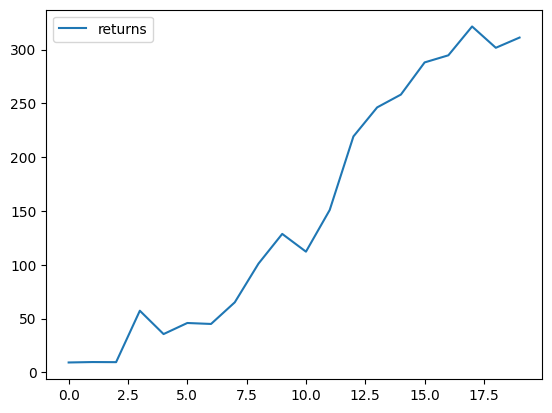

In [86]:
pd.DataFrame({'returns': avg_returns}).plot()

<Axes: >

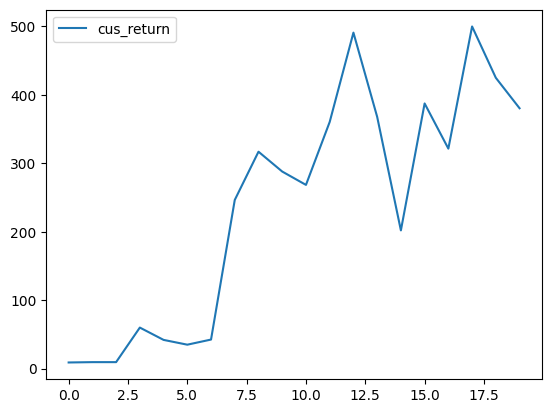

In [87]:
pd.DataFrame({'cus_return': cus_return}).plot()

Create a evaluation environment to test policy

In [88]:
eval_py_env = suite_gym.load('CartPole-v1')

In [89]:
eval_tf_env = TFPyEnvironment(eval_py_env)

In [90]:
eval_py_env.reset()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.0381218 ,  0.02638063, -0.03834511, -0.00541219], dtype=float32)})

In [91]:
eval_tf_env.reset()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.03878308,  0.00974433, -0.02248679, -0.04457033]],
      dtype=float32)>})

In [92]:
eval_py_env.current_time_step()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.03878308,  0.00974433, -0.02248679, -0.04457033], dtype=float32)})

In [93]:
eval_tf_env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.03878308,  0.00974433, -0.02248679, -0.04457033]],
      dtype=float32)>})

In [94]:
eval_tf_env.close()

In [95]:
eval_tf_env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.03878308,  0.00974433, -0.02248679, -0.04457033]],
      dtype=float32)>})

In [96]:
eval_py_env.close()

In [97]:
eval_py_env.current_time_step()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.03878308,  0.00974433, -0.02248679, -0.04457033], dtype=float32)})

In [98]:
policy = agent.policy

In [99]:
policy

In [100]:
policy.__dict__

{'_name': 'greedy_policy',
 '_name_scope': <tensorflow.python.framework.ops.name_scope_v2 at 0x1591eebc280>,
 '_time_step_spec': TimeStep(
 {'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
  'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
  'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
  'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
       dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
       dtype=float32))}),
 '_action_spec': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 '_policy_state_spec': (),
 '_emit_log_probability': False,
 '_validate_args': True,
 '_info_spec': (),
 '_policy_step_spec': PolicyStep(action=Boun

In [101]:
policy.action(eval_tf_env.current_time_step())

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0], dtype=int64)>, state=(), info=())

In [102]:
policy.wrapped_policy.__dict__

{'_flat_action_spec': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name=_q_network, ref=<tf_agents.networks.q_network.QNetwork object at 0x000001591D7BDD10>)],
 '_self_unconditional_dependency_names': {'_q_network': <tf_agents.networks.q_network.QNetwork at 0x1591d7bdd10>},
 '_self_unconditional_deferred_dependencies': {},
 '_self_update_uid': -1,
 '_self_name_based_restores': set(),
 '_self_saveable_object_factories': {},
 '_q_network': <tf_agents.networks.q_network.QNetwork at 0x1591d7bdd10>,
 '_name': 'q_policy',
 '_name_scope': <tensorflow.python.framework.ops.name_scope_v2 at 0x1591ebcfaf0>,
 '_time_step_spec': TimeStep(
 {'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
  'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
  'discount': BoundedTensorSpec(shape=(), dtype=tf

In [103]:
for _ in range(5):
    time_step = eval_tf_env.reset()

    while not time_step.is_last():
        time_step = eval_tf_env.step(policy.action(time_step))
        eval_py_env.render(mode='human')

eval_py_env.close()

In [104]:
eval_py_env.close()

Save a trained agent policy to be used in another program

In [105]:
from tf_agents.policies.policy_saver import PolicySaver

In [106]:
policy_saver = PolicySaver(policy= agent.policy)

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects